<a href="https://www.kaggle.com/code/lalit7881/biology-benchmark-dataset?scriptVersionId=291941674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/protein-benchmark-dataset/protein_100sample.csv
/kaggle/input/protein-benchmark-dataset/ecoli_100seq_protein.csv
/kaggle/input/protein-benchmark-dataset/random_100_organisms.csv
/kaggle/input/protein-benchmark-dataset/taxonomic_rank_identification.csv


## Biology Benchmark Dataset

## Detailed Description:
The Biology Benchmark Dataset is a curated collection of biological data designed to evaluate, compare, and validate analytical, statistical, and machine learning models in the life sciences domain. It includes well-structured samples representing key biological concepts such as genetics, molecular biology, cellular processes, physiology, and experimental outcomes.

The dataset is standardized to ensure consistency, reproducibility, and fair benchmarking across different models and techniques. It can be used for tasks such as classification, prediction, clustering, feature extraction, and performance comparison. Researchers, students, and practitioners can leverage this dataset to test algorithm robustness, assess biological pattern recognition, and support educational or research-driven experimentation in computational biology and bioinformatics.

## Import data

In [2]:
df = pd.read_csv("/kaggle/input/protein-benchmark-dataset/protein_100sample.csv")

In [3]:
df.head()

,Entry,Sequence,Function,Location,Length,Mol_weight
0,O34680,MKVVSLFSGIGGIELGLHQSGHTTEIFCEVDPLAKAVLSKNFPGVK...,"DNA (cytosine-5-)-methyltransferase activity, ...",molecular_function,334.0,36826.7447
1,P0AG30,MNLTELKNTPVSELITLGENMGLENLARMRKQDIIFAILKQHAKSG...,cytosol [GO:0005829]; membrane [GO:0016020]; A...,cellular_component,167.0,18695.0759
2,P0A9Q7,MAVTNVAELNALVERVKKAQREYASFTQEQVDKIFRAAALAAADAR...,cytosol [GO:0005829]; membrane [GO:0016020]; a...,cellular_component,360.0,38589.7170
3,P0ADL1,MSEFIAENRGADAITRPNWSAVFSVAFCVACLIIVEFLPVSLLTPM...,plasma membrane [GO:0005886]; antiporter activ...,cellular_component,179.0,20018.8503
4,P0A9K7,MDSLNLNKHISGQFNAELESIRTQVMTMGGMVEQQLSDAITAMHNQ...,cytoplasm [GO:0005737]; magnesium ion binding ...,cellular_component,798.0,89182.6519


In [4]:
df.tail()

,Entry,Sequence,Function,Location,Length,Mol_weight
95,P0AG96,MSANTEAQGSGRGLEAMKWVVVVALLLVAIVGNYLYRDIMLPLRAL...,cell envelope Sec protein transport complex [G...,cellular_component,57.0,6446.3097
96,P0A9X9,MSGKMTGIVKWFNADKGFGFITPDDGSKDVFVHFSAIQNDGYKSLD...,cytosol [GO:0005829]; DNA binding [GO:0003677]...,cellular_component,798.0,89182.6519
97,P0ABS8,MLKNLAKLDQTEMDKVNVDLAAAGVAFKERYNMPVIAEAVEREQPE...,cytosol [GO:0005829]; DNA polymerase III compl...,cellular_component,432.0,46891.7714
98,P00803,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,plasma membrane [GO:0005886]; endopeptidase ac...,cellular_component,633.0,70855.7153
99,P0AD68,MKAAAKTQKPKRQEEHANFISWRFALLCGCILLALAFLLGRVAWLQ...,cell division site [GO:0032153]; divisome comp...,cellular_component,207.0,23186.4098


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entry       100 non-null    object 
 1   Sequence    100 non-null    object 
 2   Function    100 non-null    object 
 3   Location    100 non-null    object 
 4   Length      79 non-null     float64
 5   Mol_weight  79 non-null     float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [6]:
df.describe()

,Length,Mol_weight
count,79.000000,79.000000
mean,336.468354,37304.893887
std,202.405270,22577.370573
min,57.000000,6446.309700
25%,174.000000,19356.963100
50%,294.000000,32238.406200
75%,424.000000,45627.634900
max,1061.000000,119466.805100


In [7]:
df.isnull().sum()

Entry          0
Sequence       0
Function       0
Location       0
Length        21
Mol_weight    21
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
df.dtypes

Entry          object
Sequence       object
Function       object
Location       object
Length        float64
Mol_weight    float64
dtype: object

In [10]:
df.shape

(100, 6)

In [11]:
df.columns

Index(['Entry', 'Sequence', 'Function', 'Location', 'Length', 'Mol_weight'], dtype='object')

## Data visualizations

In [12]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nNumerical Summary:\n", df[['Length', 'Mol_weight']].describe())


Dataset Shape: (100, 6)

Missing Values:
 Entry          0
Sequence       0
Function       0
Location       0
Length        21
Mol_weight    21
dtype: int64

Numerical Summary:
             Length     Mol_weight
count    79.000000      79.000000
mean    336.468354   37304.893887
std     202.405270   22577.370573
min      57.000000    6446.309700
25%     174.000000   19356.963100
50%     294.000000   32238.406200
75%     424.000000   45627.634900
max    1061.000000  119466.805100


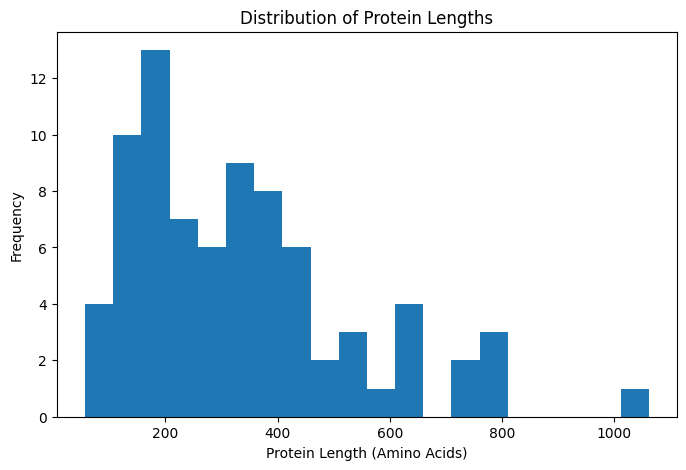

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['Length'], bins=20)
plt.xlabel("Protein Length (Amino Acids)")
plt.ylabel("Frequency")
plt.title("Distribution of Protein Lengths")
plt.show()


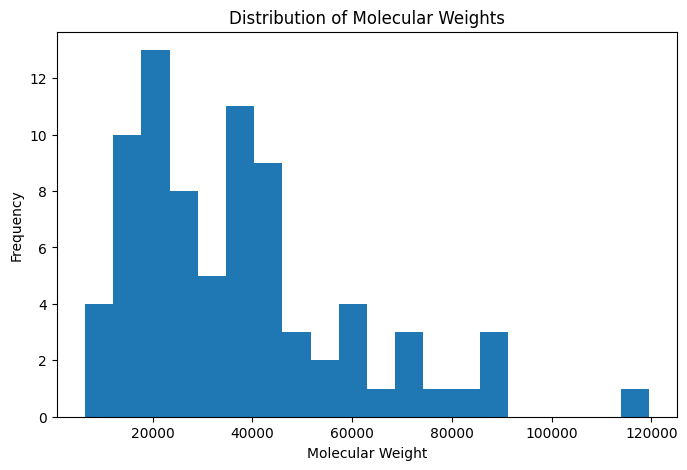

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['Mol_weight'], bins=20)
plt.xlabel("Molecular Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Molecular Weights")
plt.show()


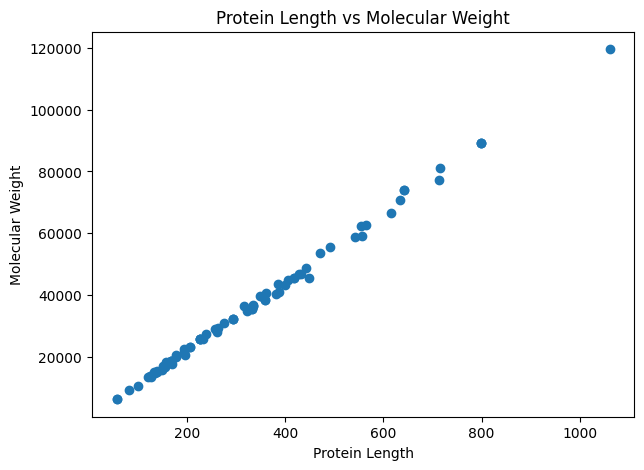

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(df['Length'], df['Mol_weight'])
plt.xlabel("Protein Length")
plt.ylabel("Molecular Weight")
plt.title("Protein Length vs Molecular Weight")
plt.show()


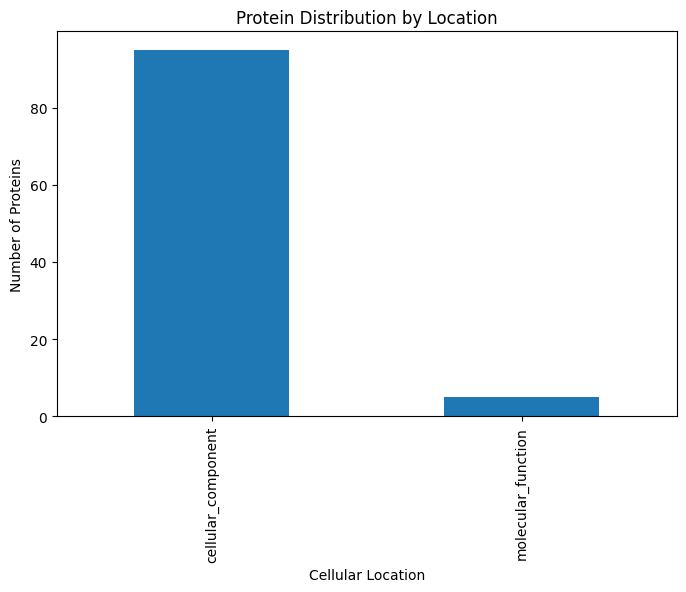

In [16]:
location_counts = df['Location'].value_counts()

plt.figure(figsize=(8,5))
location_counts.plot(kind='bar')
plt.xlabel("Cellular Location")
plt.ylabel("Number of Proteins")
plt.title("Protein Distribution by Location")
plt.show()


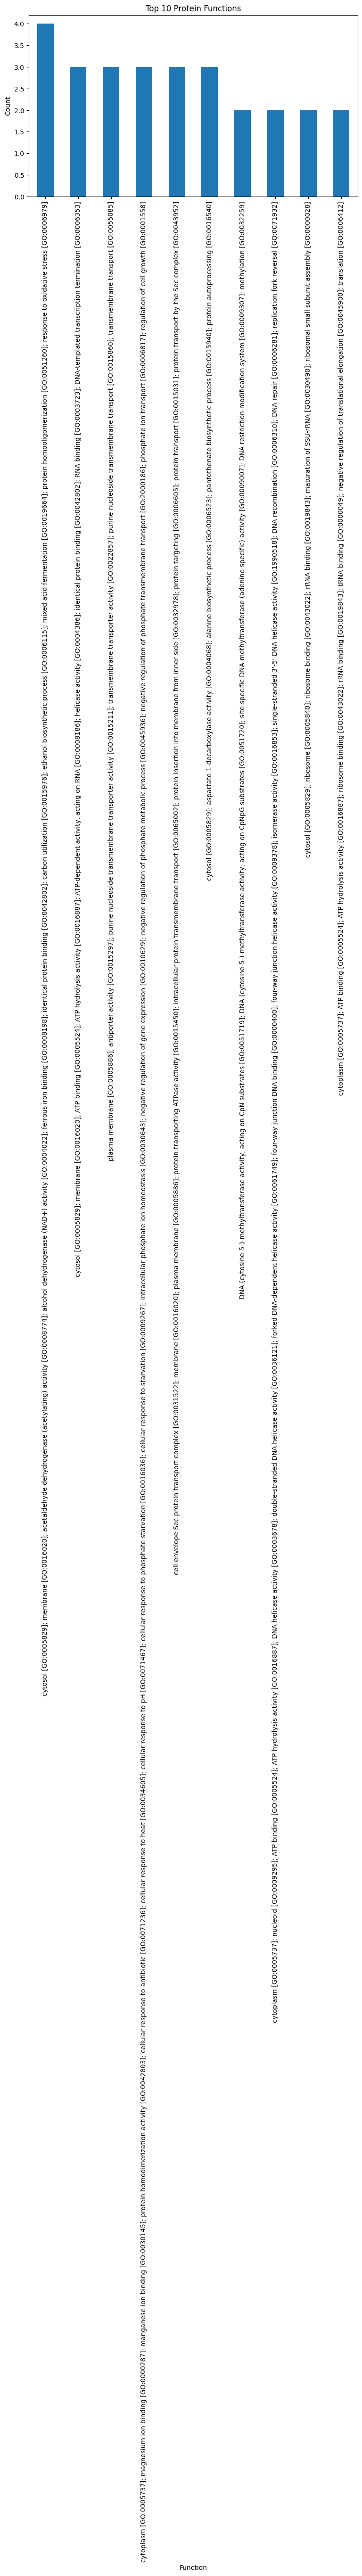

In [17]:
function_counts = df['Function'].value_counts().head(10)

plt.figure(figsize=(9,5))
function_counts.plot(kind='bar')
plt.xlabel("Function")
plt.ylabel("Count")
plt.title("Top 10 Protein Functions")
plt.show()


<Figure size 900x500 with 0 Axes>

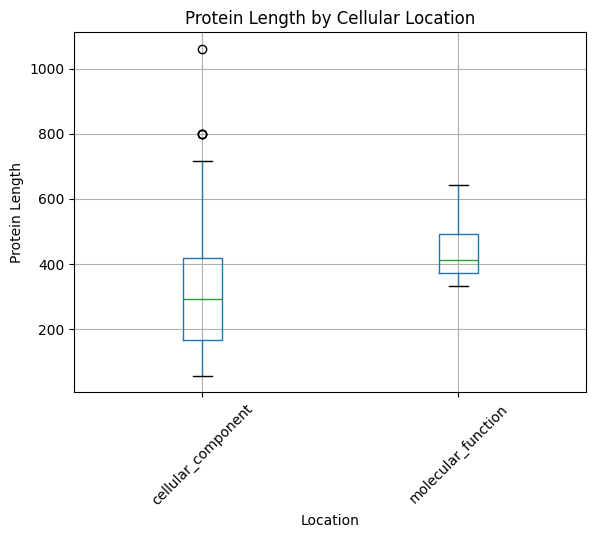

In [18]:
plt.figure(figsize=(9,5))
df.boxplot(column='Length', by='Location', rot=45)
plt.xlabel("Location")
plt.ylabel("Protein Length")
plt.title("Protein Length by Cellular Location")
plt.suptitle("")
plt.show()


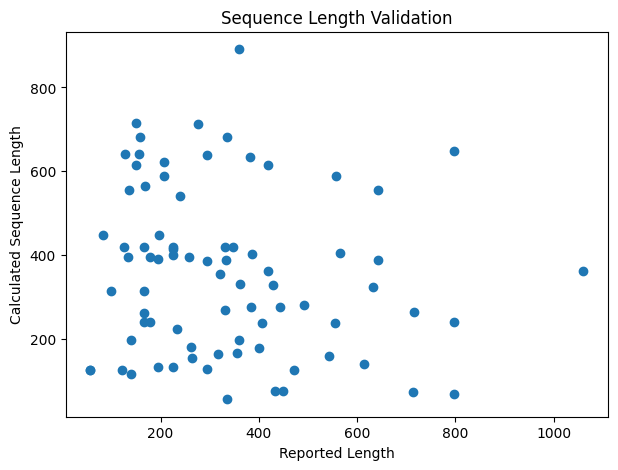

In [19]:
df['Seq_Length_Calc'] = df['Sequence'].apply(len)

plt.figure(figsize=(7,5))
plt.scatter(df['Length'], df['Seq_Length_Calc'])
plt.xlabel("Reported Length")
plt.ylabel("Calculated Sequence Length")
plt.title("Sequence Length Validation")
plt.show()


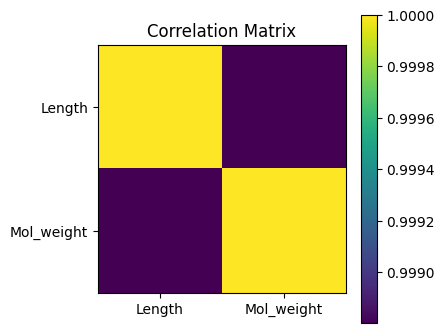

In [20]:
corr = df[['Length', 'Mol_weight']].corr()

plt.figure(figsize=(4,4))
plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


## ML Algorithms

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
df['Sequence_Length'] = df['Sequence'].apply(len)

In [23]:
X = df[['Length', 'Mol_weight', 'Sequence_Length', 'Location']]
y = df['Function']

In [24]:
num_imputer = SimpleImputer(strategy='mean')
X[['Length', 'Mol_weight', 'Sequence_Length']] = num_imputer.fit_transform(
    X[['Length', 'Mol_weight', 'Sequence_Length']]
)


In [25]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X[['Location']] = cat_imputer.fit_transform(X[['Location']])


In [26]:
le_location = LabelEncoder()
X['Location'] = le_location.fit_transform(X['Location'])

le_target = LabelEncoder()
y = le_target.fit_transform(y)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC()
}


In [29]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy


In [30]:
for model, acc in results.items():
    print(f"{model} Accuracy: {acc:.2f}%")


Logistic Regression Accuracy: 0.00%
Naive Bayes Accuracy: 5.00%
K-Nearest Neighbors Accuracy: 0.00%
Decision Tree Accuracy: 25.00%
Random Forest Accuracy: 0.00%
Support Vector Machine Accuracy: 0.00%


In [31]:
accuracy_df = pd.DataFrame(
    results.items(),
    columns=["Model", "Accuracy (%)"]
)

accuracy_df.sort_values(by="Accuracy (%)", ascending=False)


,Model,Accuracy (%)
3,Decision Tree,25.0
1,Naive Bayes,5.0
0,Logistic Regression,0.0
2,K-Nearest Neighbors,0.0
4,Random Forest,0.0
5,Support Vector Machine,0.0
